# Export shock

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find steady state and Jacobian](#toc2_)    
- 3. [Find IRF](#toc3_)    
- 4. [Figures](#toc4_)    
  - 4.1. [Effect on Foreign Economy and Prices](#toc4_1_)    
  - 4.2. [Effect on Production firms, Phillips-curve and Investments](#toc4_2_)    
    - 4.2.1. [Production firms](#toc4_2_1_)    
    - 4.2.2. [Phillips-curve](#toc4_2_2_)    
    - 4.2.3. [Investments](#toc4_2_3_)    
  - 4.3. [Labor market](#toc4_3_)    
  - 4.4. [Government](#toc4_4_)    
  - 4.5. [Effect on consumption](#toc4_5_)    
    - 4.5.1. [Effect on bequest and savings](#toc4_5_1_)    
  - 4.6. [Other](#toc4_6_)    
    - 4.6.1. [Households - life-cycle](#toc4_6_1_)    
    - 4.6.2. [Long-term](#toc4_6_2_)    
    - 4.6.3. [National accouting - quantities](#toc4_6_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')           

**Unpack namespaces:**

In [3]:
par = model.par                 
ss = model.ss                   
sol = model.sol                

## 2. <a id='toc2_'></a>[Find steady state and Jacobian](#toc0_)

**Find SS:**

In [4]:
model.find_ss()                 

**Jacobian:**

In [5]:
model.compile(do_print=True)

model compiled, 1.0 mins 13 secs


In [6]:
model.calc_jac(do_print=True)   

Jacobian calculated in 3.4 secs


## 3. <a id='toc3_'></a>[Find IRF](#toc0_)

**Set exogenous variables:**

In [7]:
model.set_exo_ss()              

**Define shock:**

In [8]:
Tshock = 50                                                                 # length of shock
persistence = np.array([0.80**np.arange(Tshock)])                           # persistence of shock       
persistence = persistence.reshape((Tshock,1)) 
Priceshock = 0.005                                                          # size of the price shock

model.sol.chi[:Tshock,:] = model.ss.chi*(1 + 2*Priceshock*persistence)      # the shock to chi is twice as large as the price shock 
model.sol.P_F[:Tshock,:] = model.ss.P_F*(1 + Priceshock*persistence)        # shock to the foreign price
model.sol.P_M_C[:Tshock,:] = model.ss.P_M_C*(1 + Priceshock*persistence)    # shock to the consumption import price 
model.sol.P_M_G[:Tshock,:] = model.ss.P_M_G*(1 + Priceshock*persistence)    # shock to the government consumption import price  
model.sol.P_M_I[:Tshock,:] = model.ss.P_M_I*(1 + Priceshock*persistence)    # shock to the investment import price  
model.sol.P_M_X[:Tshock,:] = model.ss.P_M_X*(1 + Priceshock*persistence)    # shock to the export import price  

**Find IRF:**

In [9]:
model.find_IRF()              

initial:
t1-t0 = 0.07201 secs
it = 5
    max. abs. error = 8.29e-12
    4.57e-13 in A_R_ini_error
    1.83e-14 in Aq_diff
    4.82e-14 in FOC_capital_agency
    8.29e-12 in FOC_K_ell
    4.70e-12 in mkt_clearing
    4.57e-13 in PC

solve: t1-t0 = 0.07506 secs
evaluate + update: t3-t2 = 0.14312 secs


## 4. <a id='toc4_'></a>[Figures](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Effect on Foreign Economy and Prices](#toc0_)

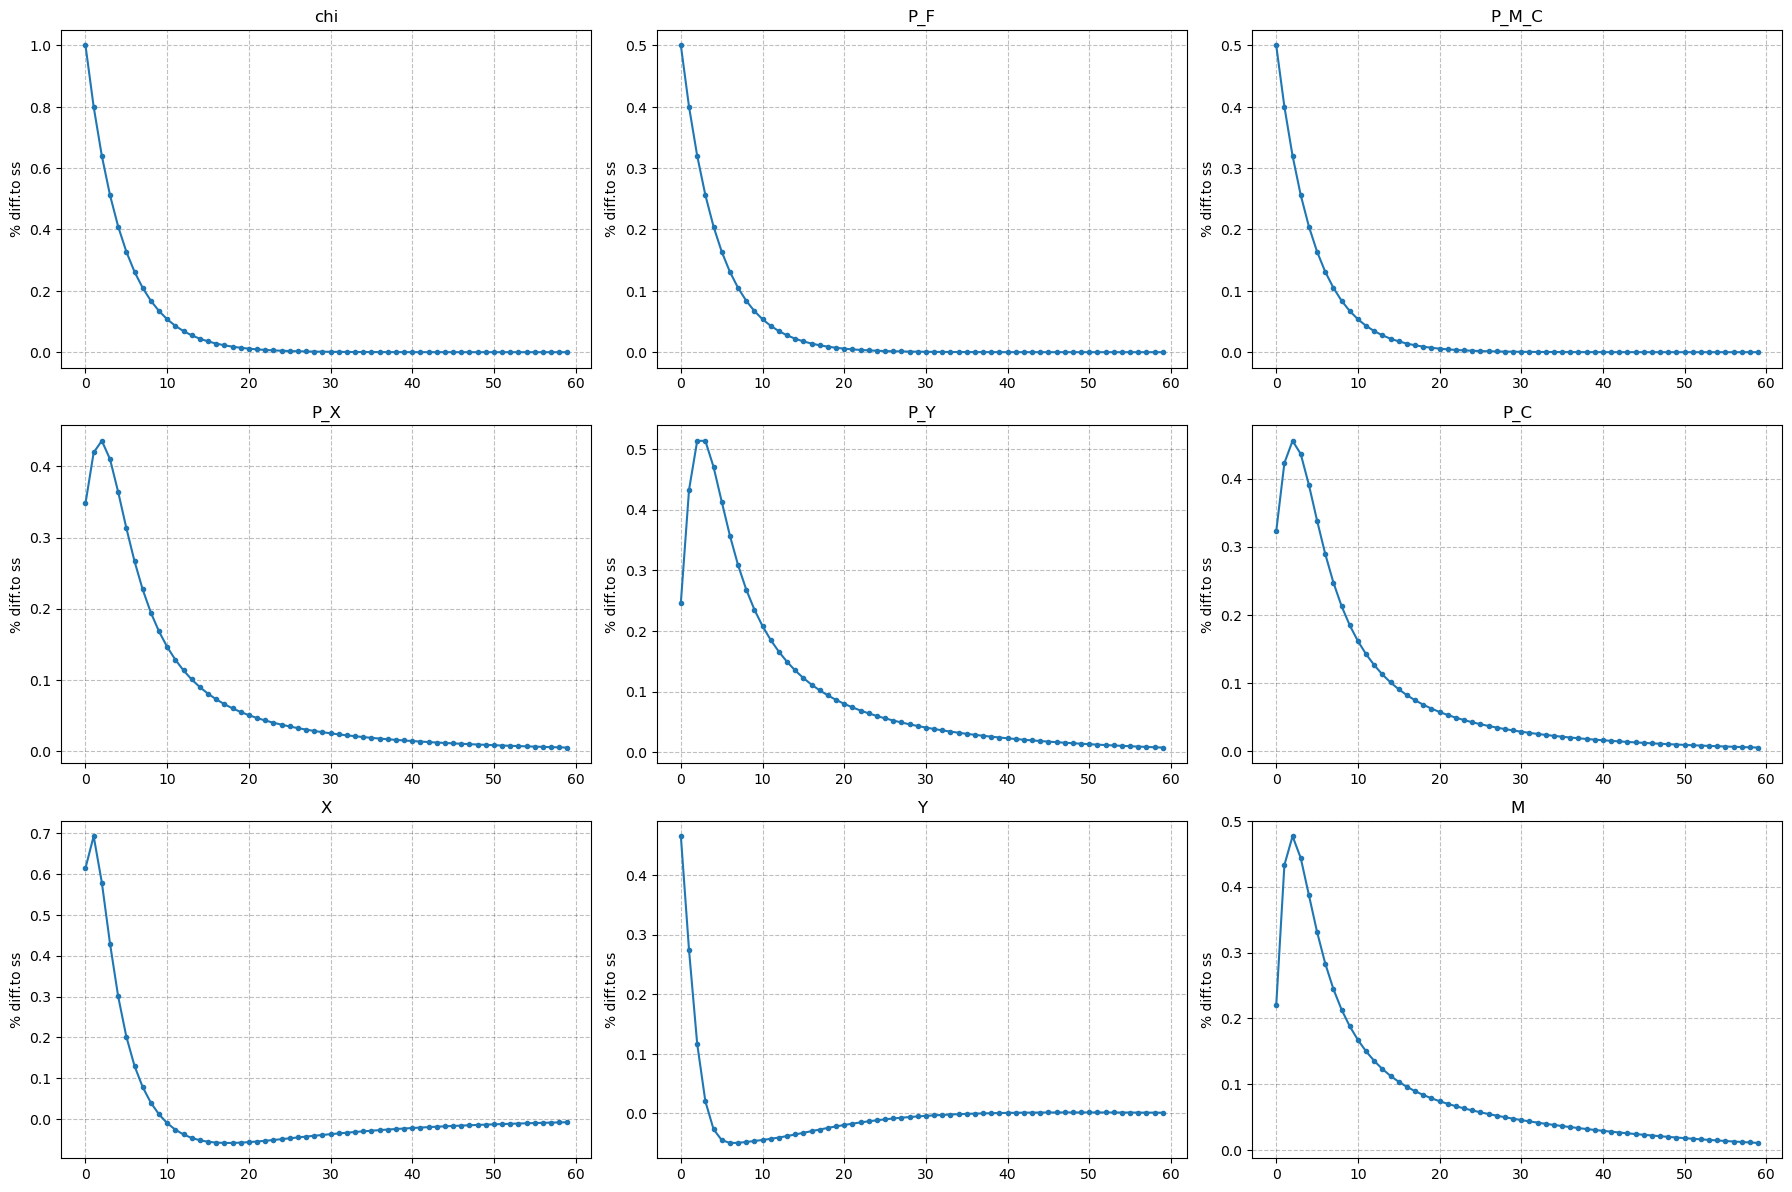

In [10]:
model.plot_IRF(varlist=['chi','P_F','P_M_C','P_X','P_Y','P_C', 'X', 'Y', 'M'])

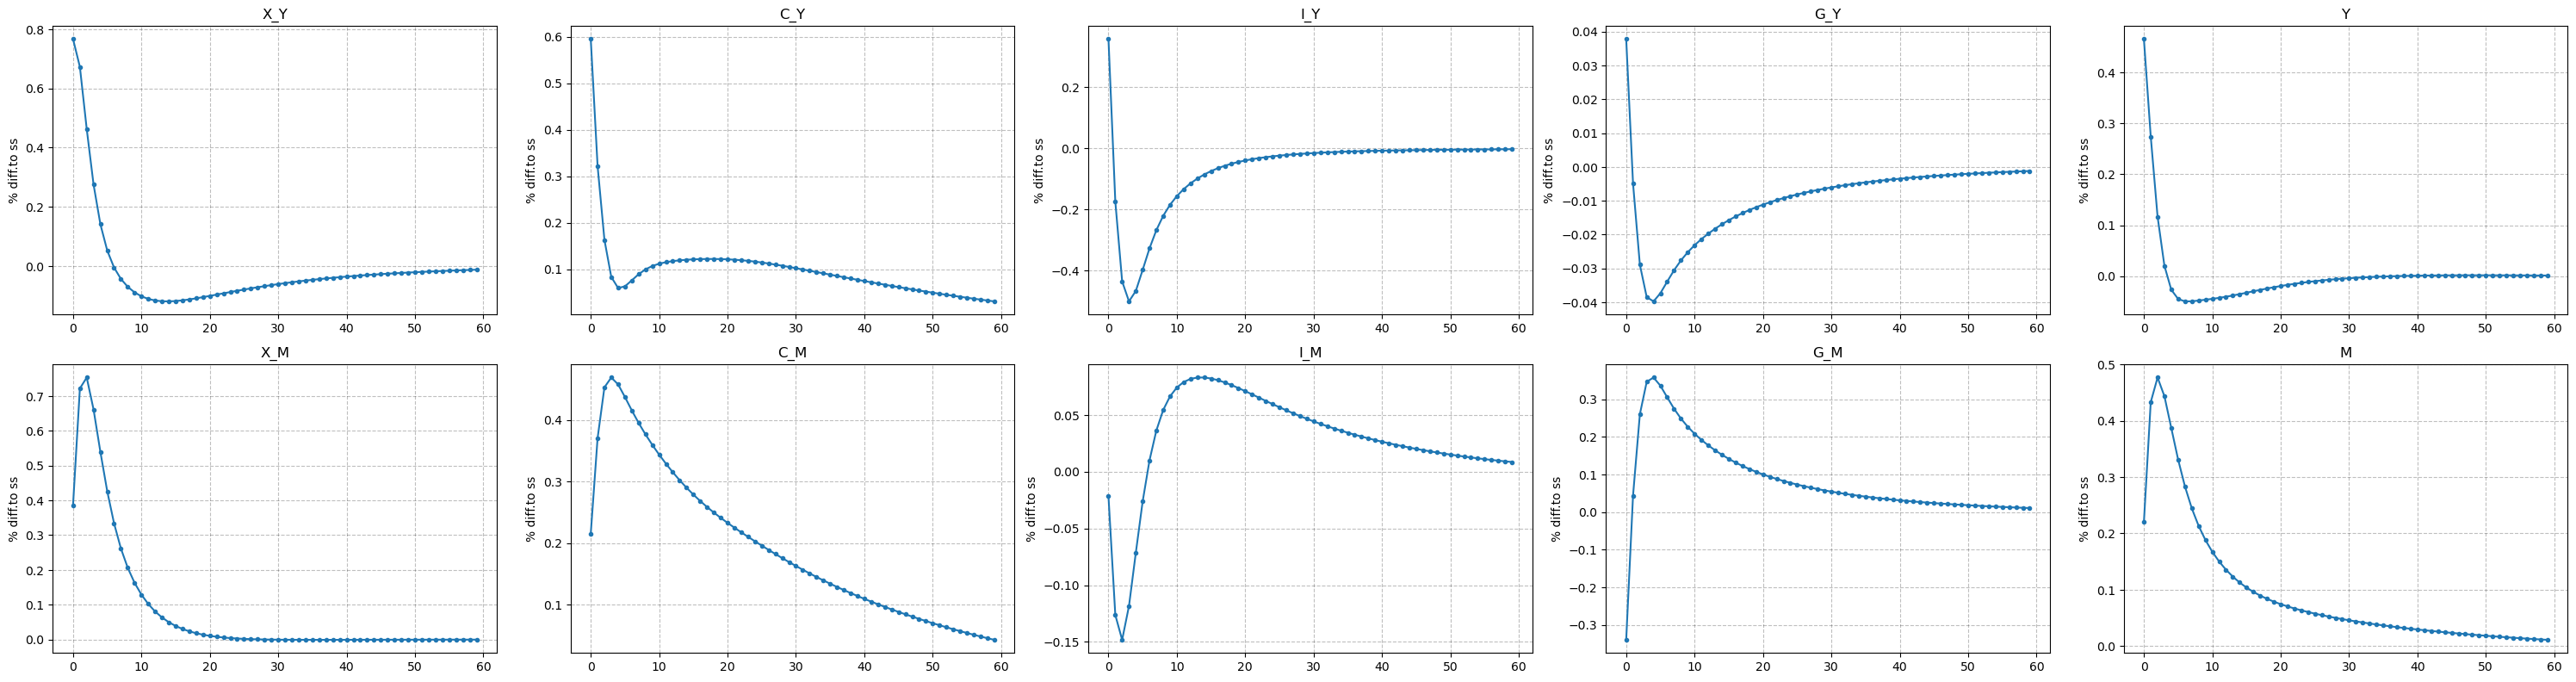

In [11]:
model.plot_IRF(varlist=['X_Y','C_Y','I_Y','G_Y','Y','X_M','C_M','I_M','G_M','M'], ncol = 5)

### 4.2. <a id='toc4_2_'></a>[Effect on Production firms, Phillips-curve and Investments](#toc0_)

#### 4.2.1. <a id='toc4_2_1_'></a>[Production firms](#toc0_)

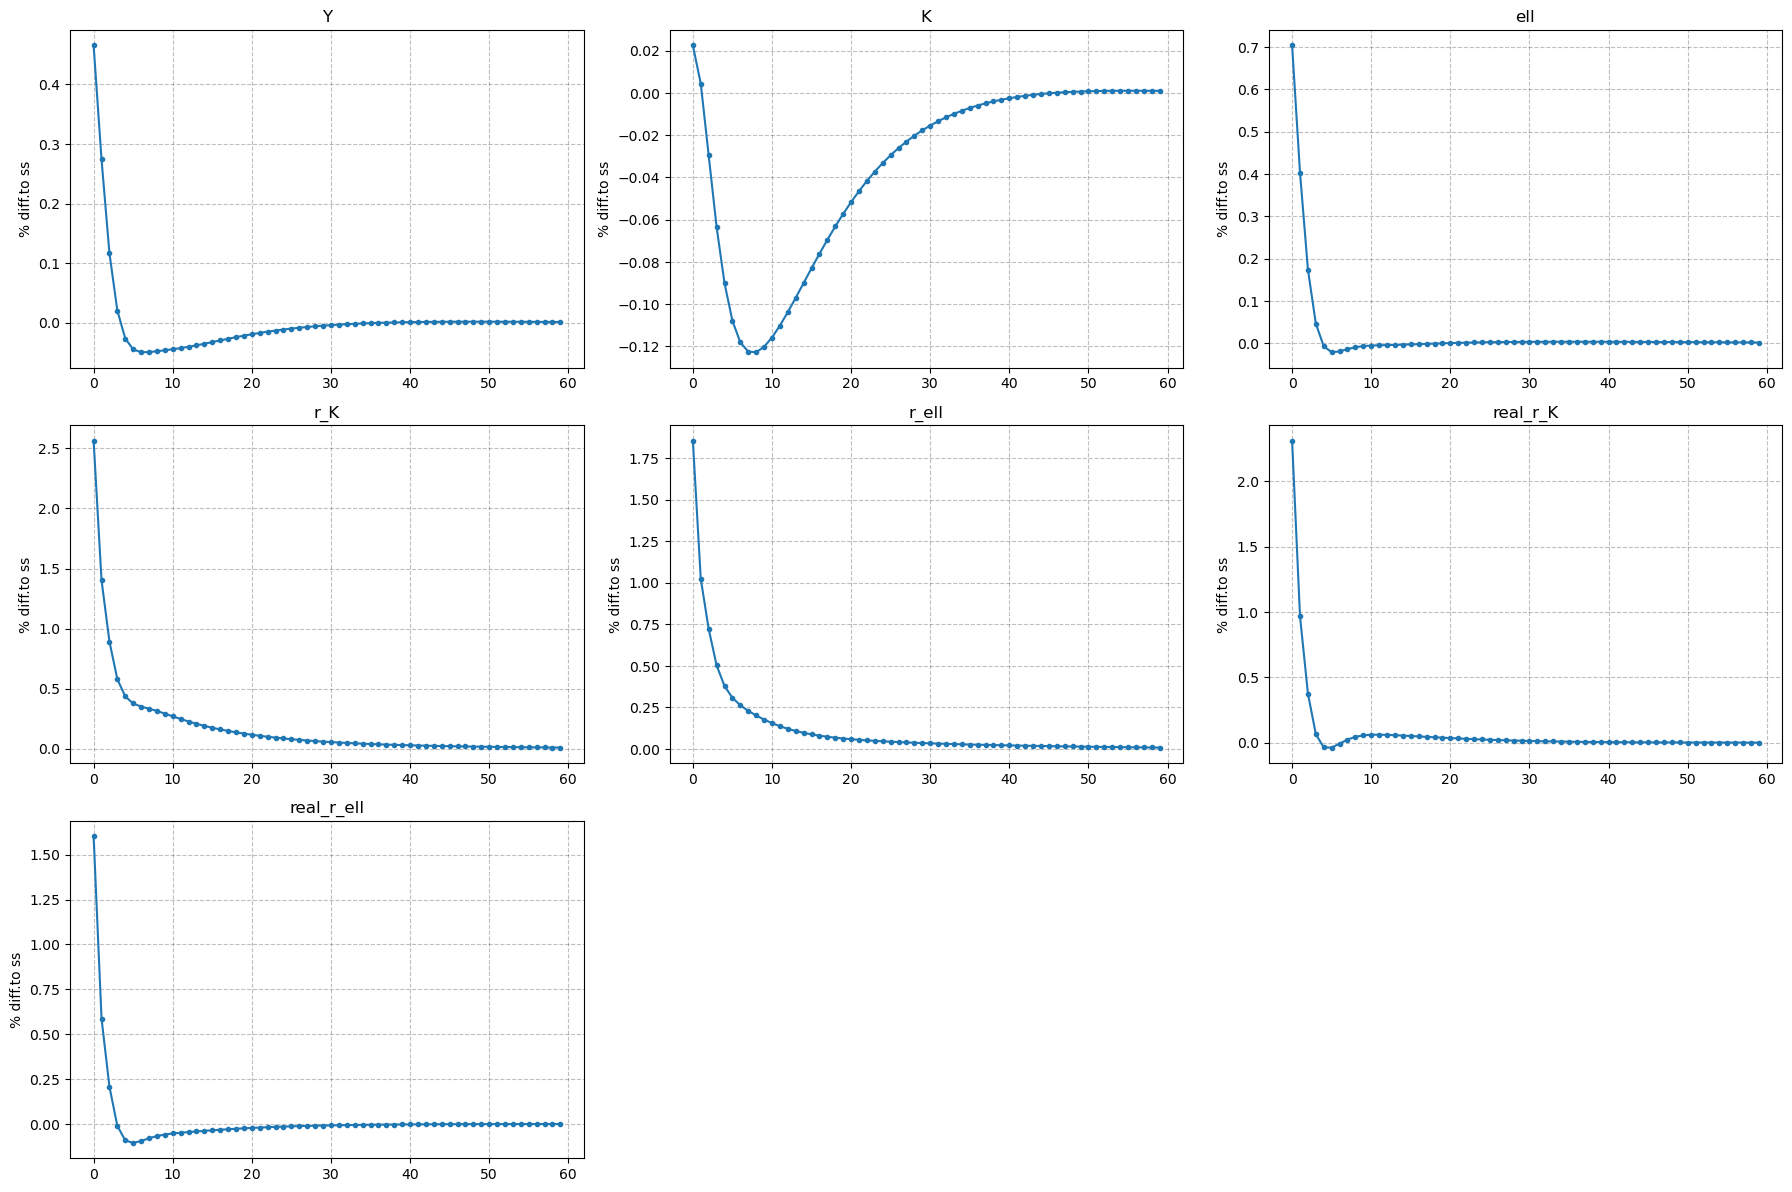

In [12]:
model.plot_IRF(varlist=['Y','K','ell','r_K','r_ell','real_r_K','real_r_ell'])

#### 4.2.2. <a id='toc4_2_2_'></a>[Phillips-curve](#toc0_)

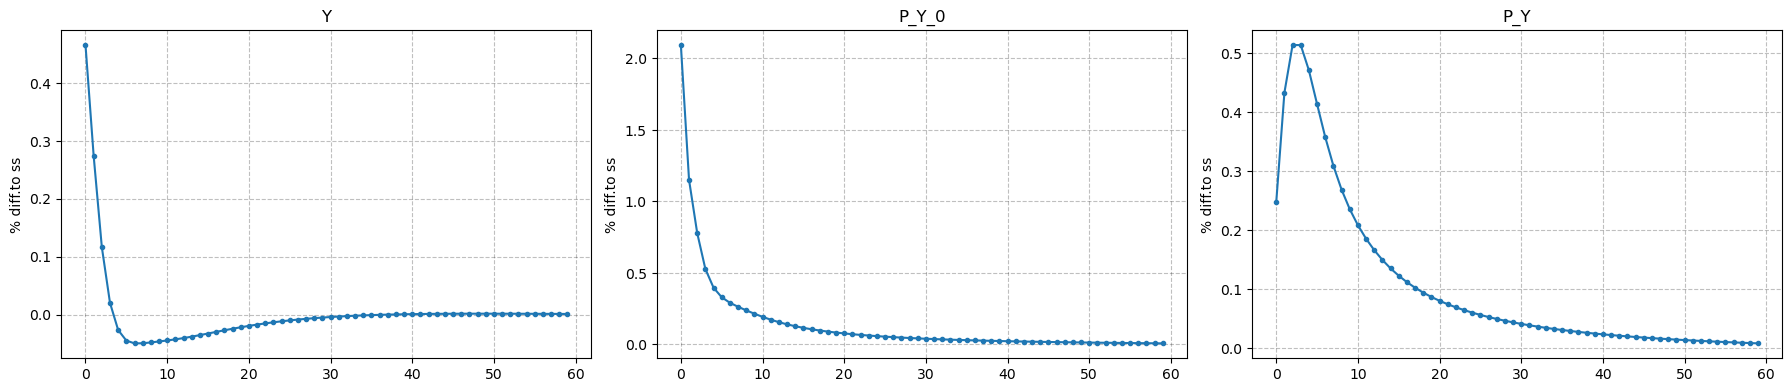

In [13]:
model.plot_IRF(varlist=['Y','P_Y_0','P_Y'])

#### 4.2.3. <a id='toc4_2_3_'></a>[Investments](#toc0_)

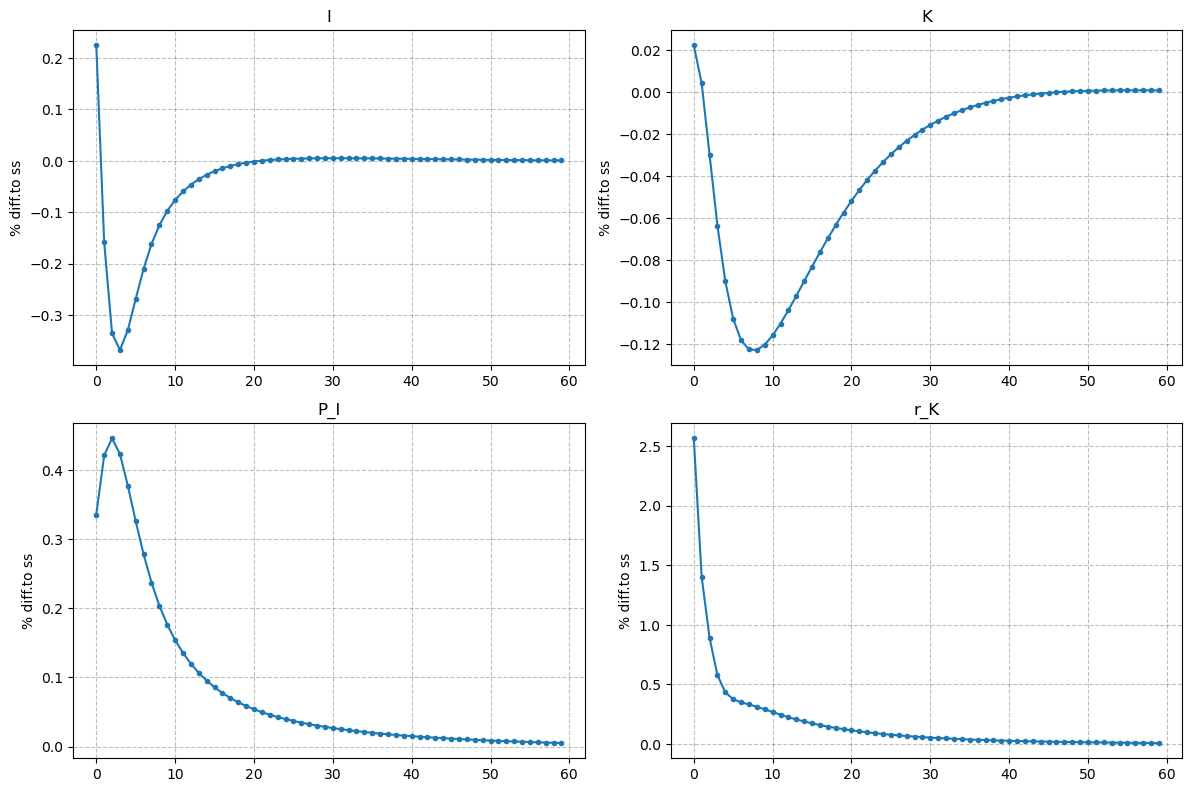

In [14]:
model.plot_IRF(varlist=['I','K','P_I','r_K'],ncol=2)

### 4.3. <a id='toc4_3_'></a>[Labor market](#toc0_)

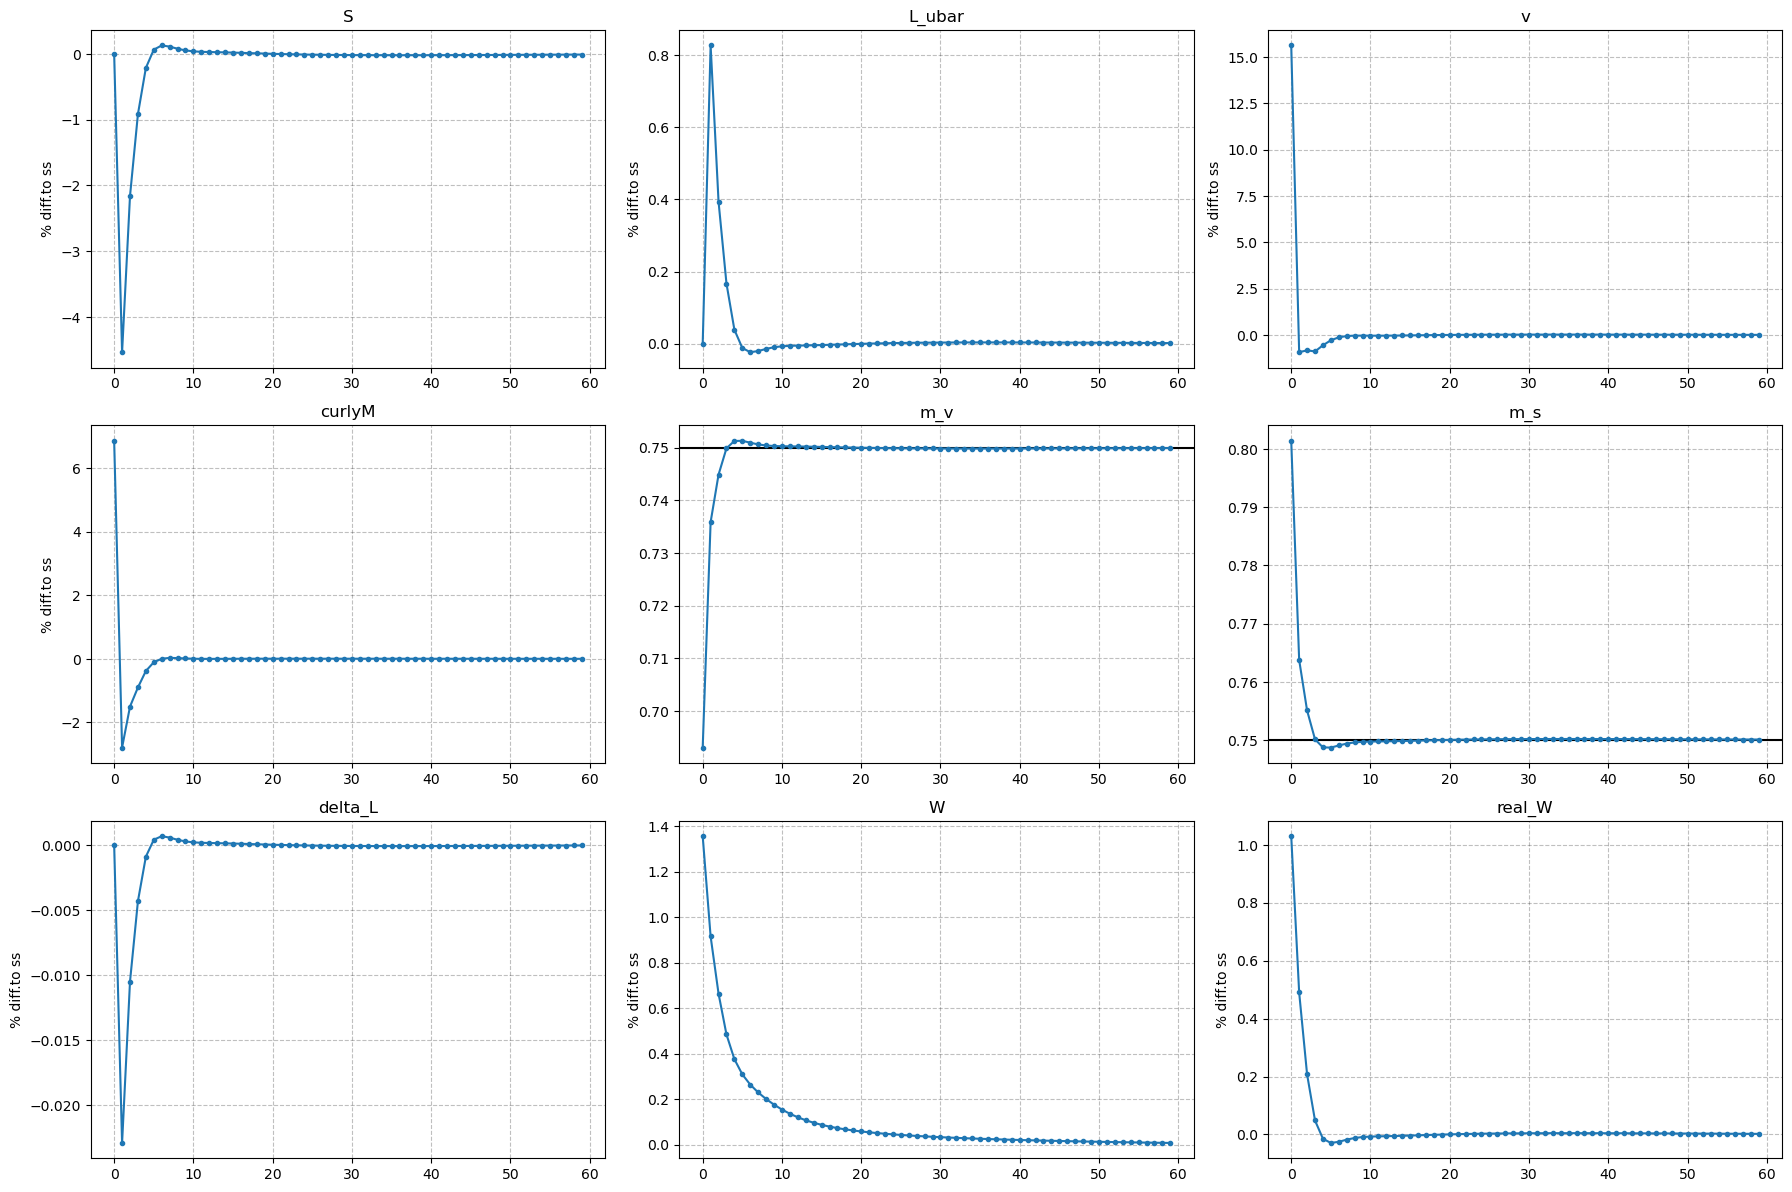

In [15]:
model.plot_IRF(varlist=['S','L_ubar','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### 4.4. <a id='toc4_4_'></a>[Government](#toc0_)

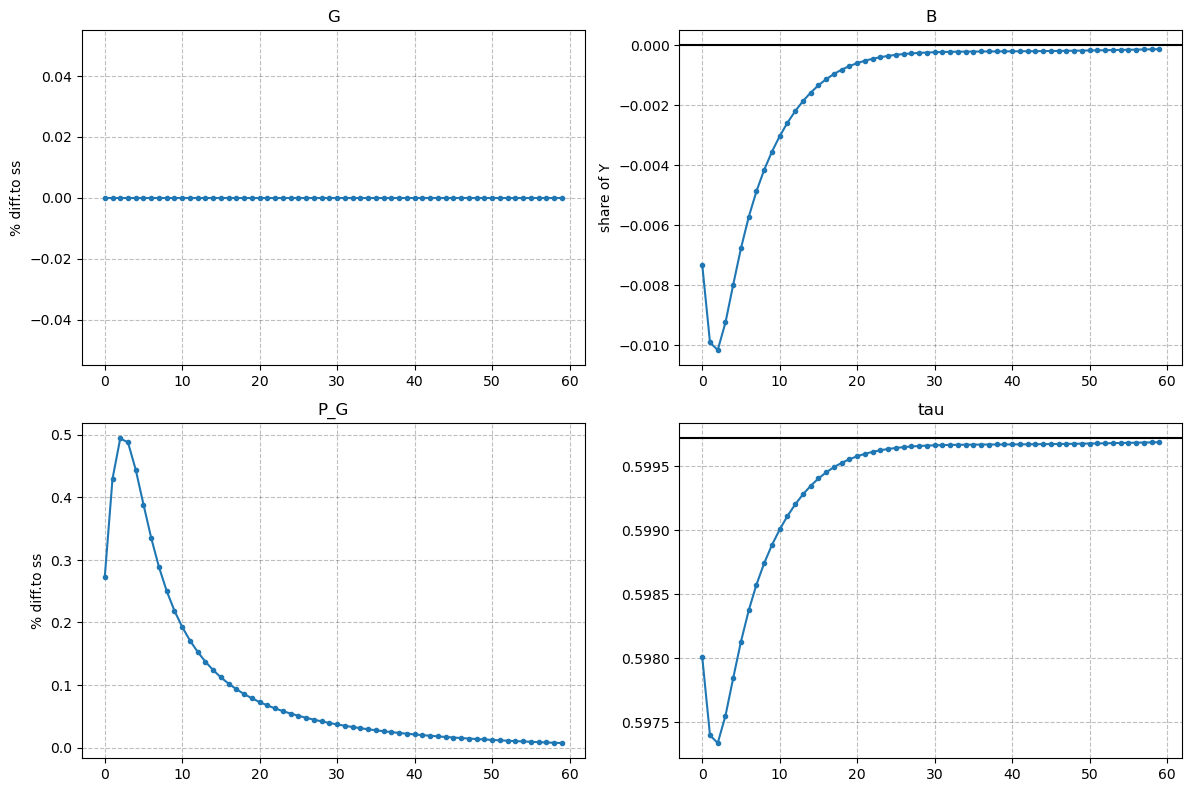

In [16]:
model.plot_IRF(varlist=['G','B','P_G','tau'],abs=['tau'],Y_share=['B'], ncol=2)

### 4.5. <a id='toc4_5_'></a>[Effect on consumption](#toc0_)

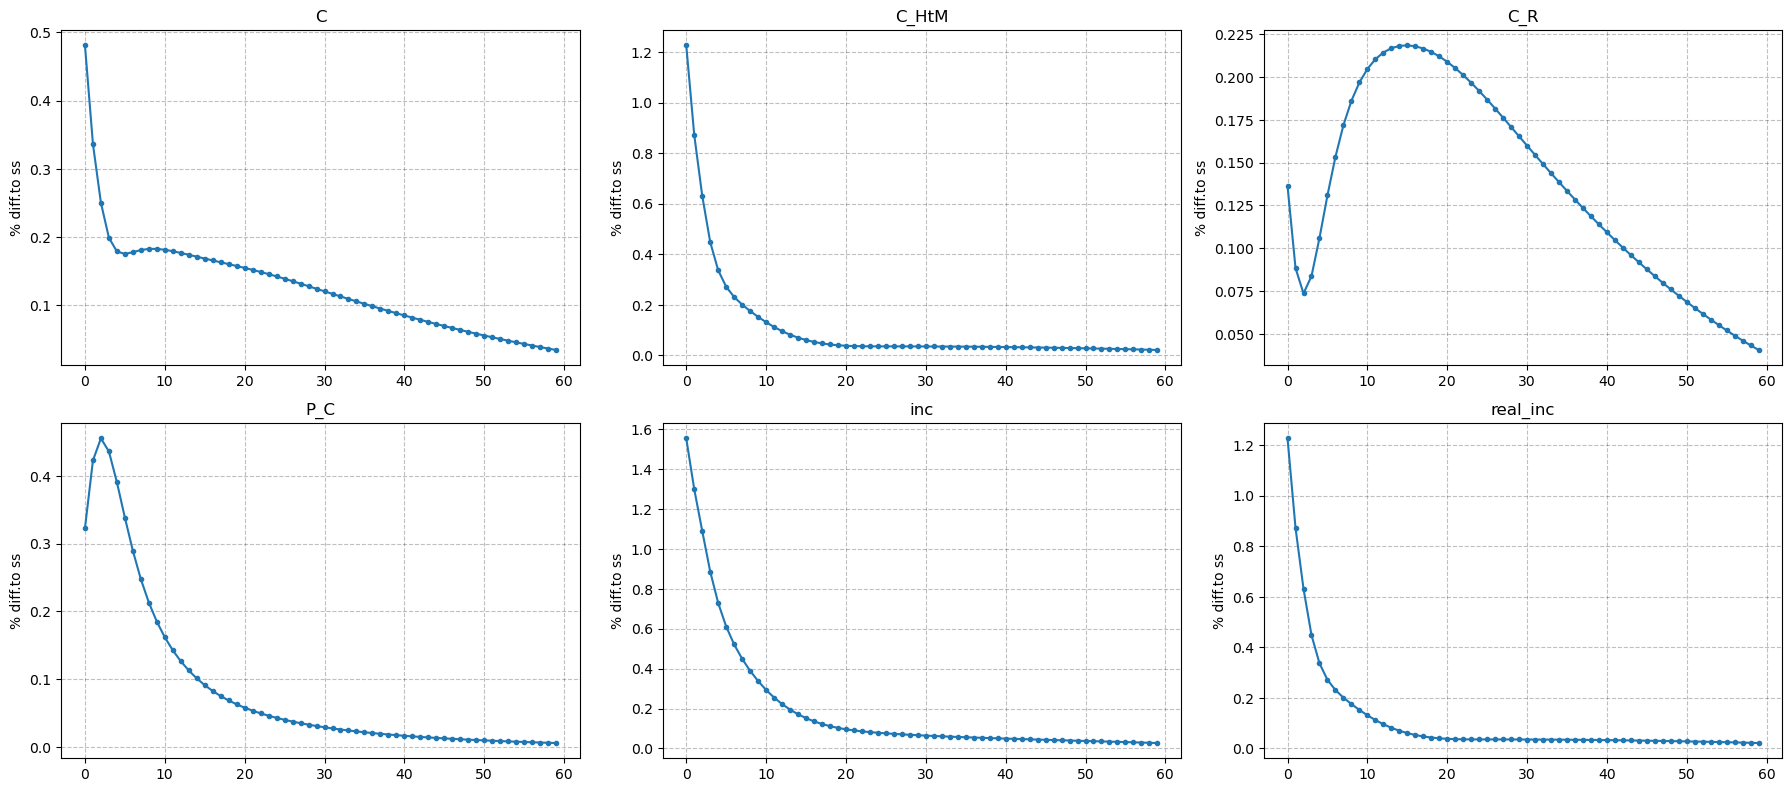

In [17]:
model.plot_IRF(varlist=['C','C_HtM','C_R','P_C','inc','real_inc'],ncol=3,abs=['real_r_hh'])

#### 4.5.1. <a id='toc4_5_1_'></a>[Effect on bequest and savings](#toc0_)

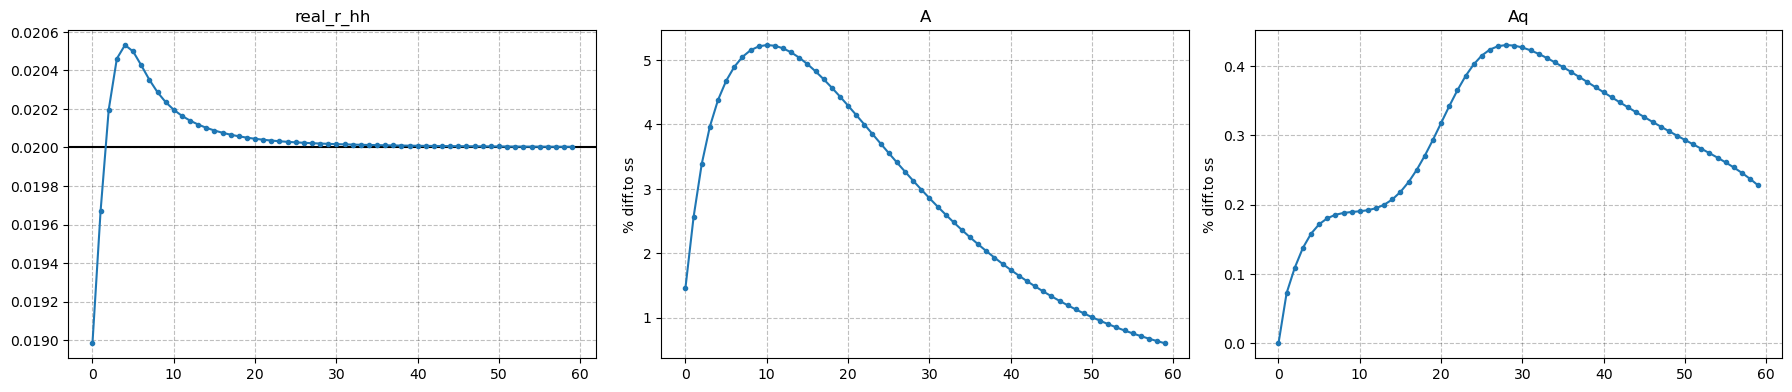

In [18]:
model.plot_IRF(varlist=['real_r_hh','A','Aq'],ncol=3,abs=['real_r_hh'])

### 4.6. <a id='toc4_6_'></a>[Other](#toc0_)

#### 4.6.1. <a id='toc4_6_1_'></a>[Households - life-cycle](#toc0_)

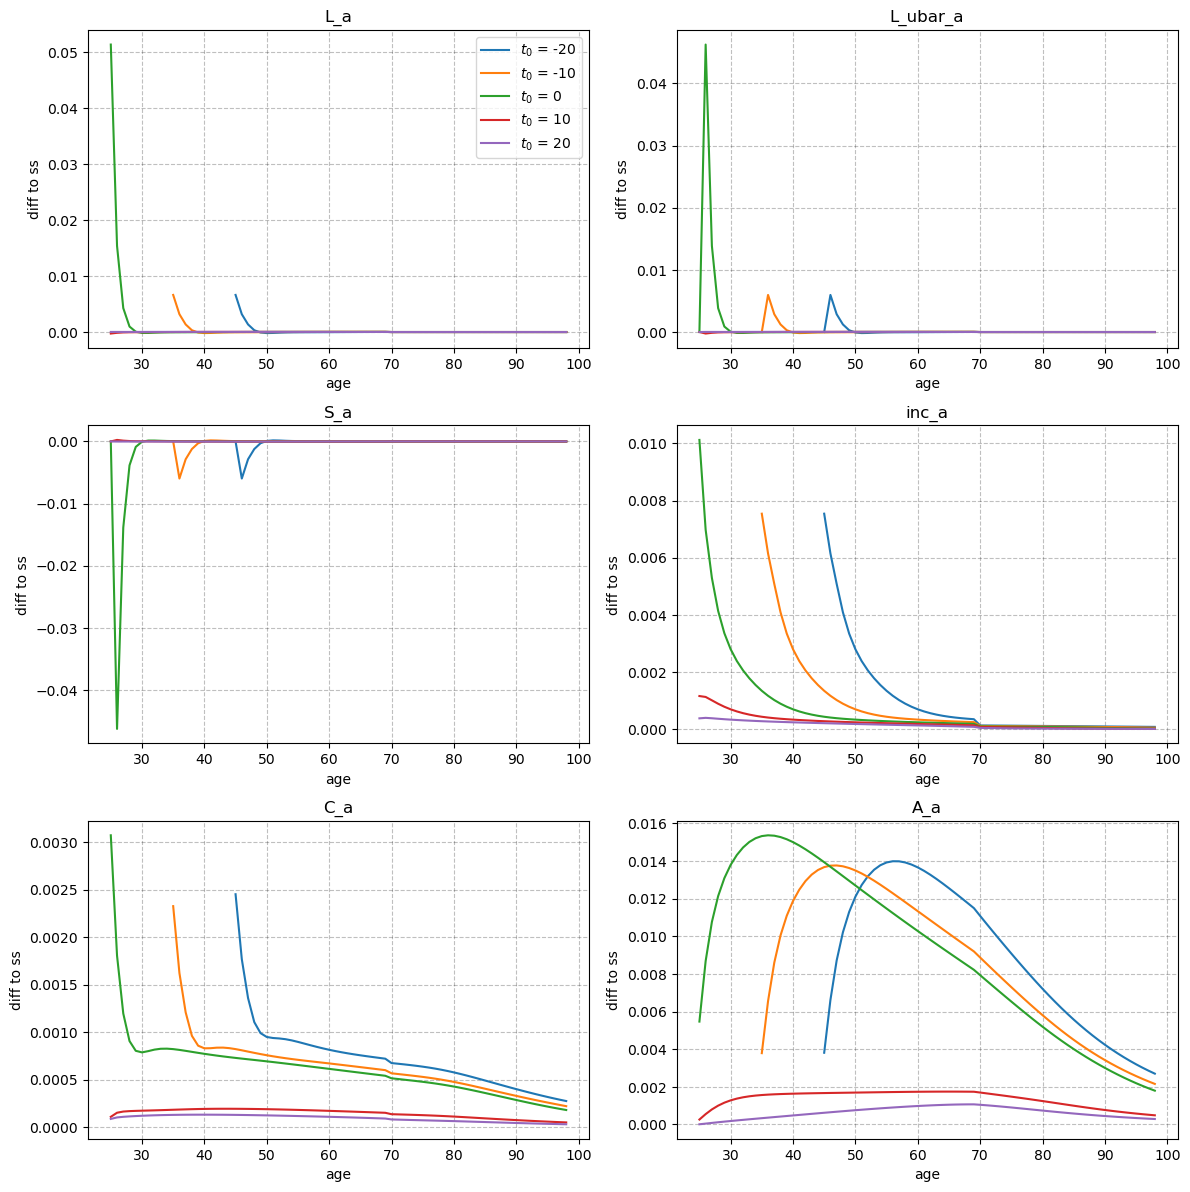

In [19]:
model.plot_IRF_hh(varlist=['L_a','L_ubar_a','S_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20])

#### 4.6.2. <a id='toc4_6_2_'></a>[Long-term](#toc0_)

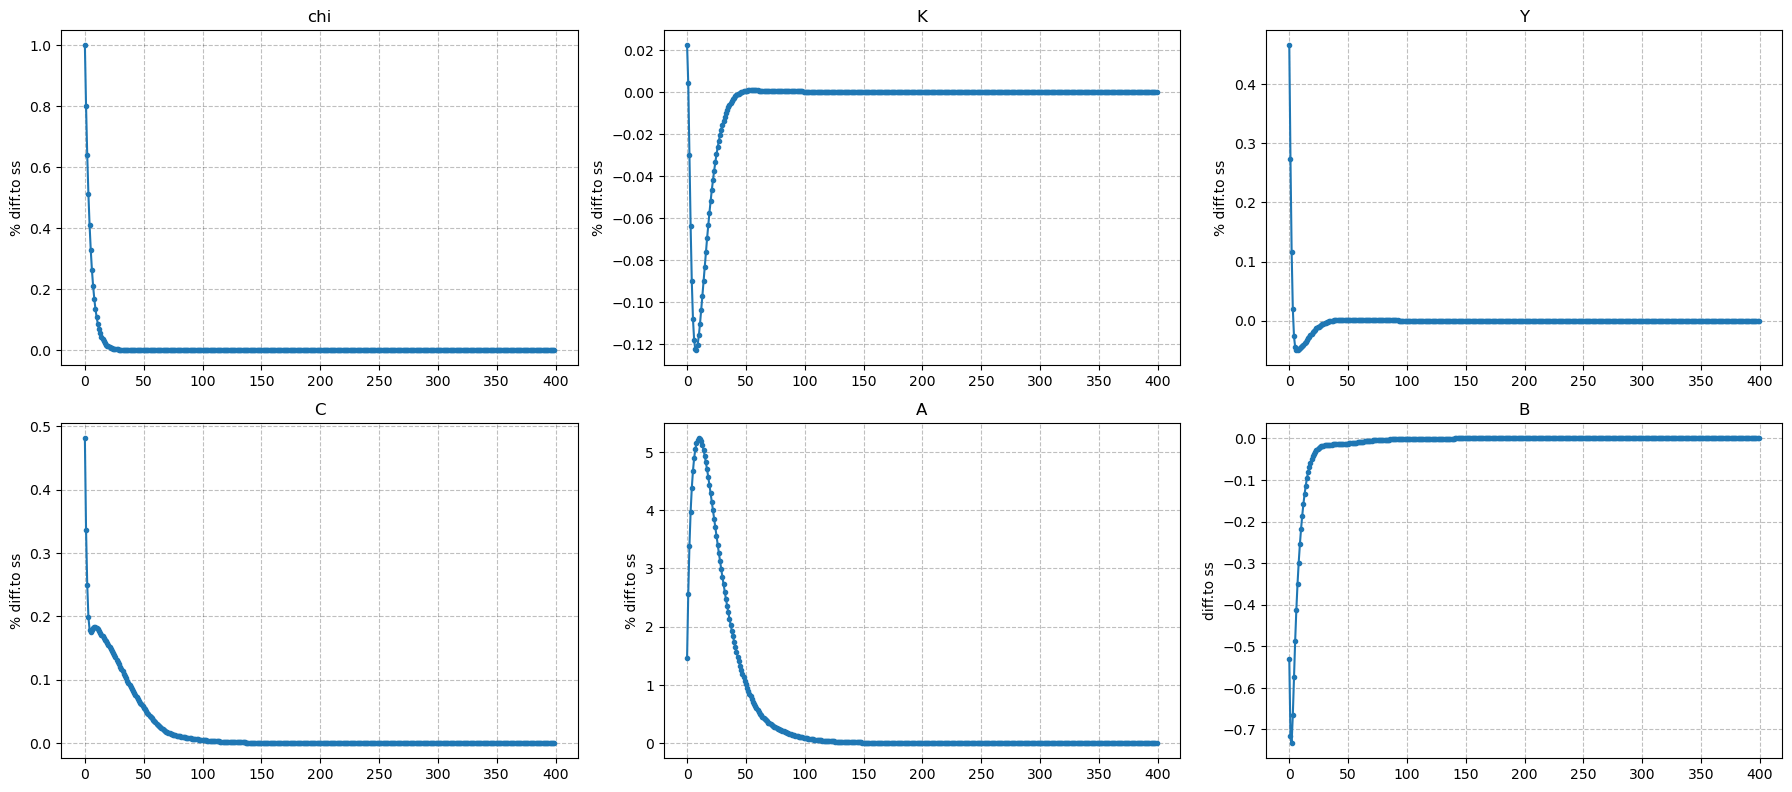

In [20]:
model.plot_IRF(varlist=['chi','K','Y','C','A','B'],T_IRF=par.T)

#### 4.6.3. <a id='toc4_6_3_'></a>[National accouting - quantities](#toc0_)

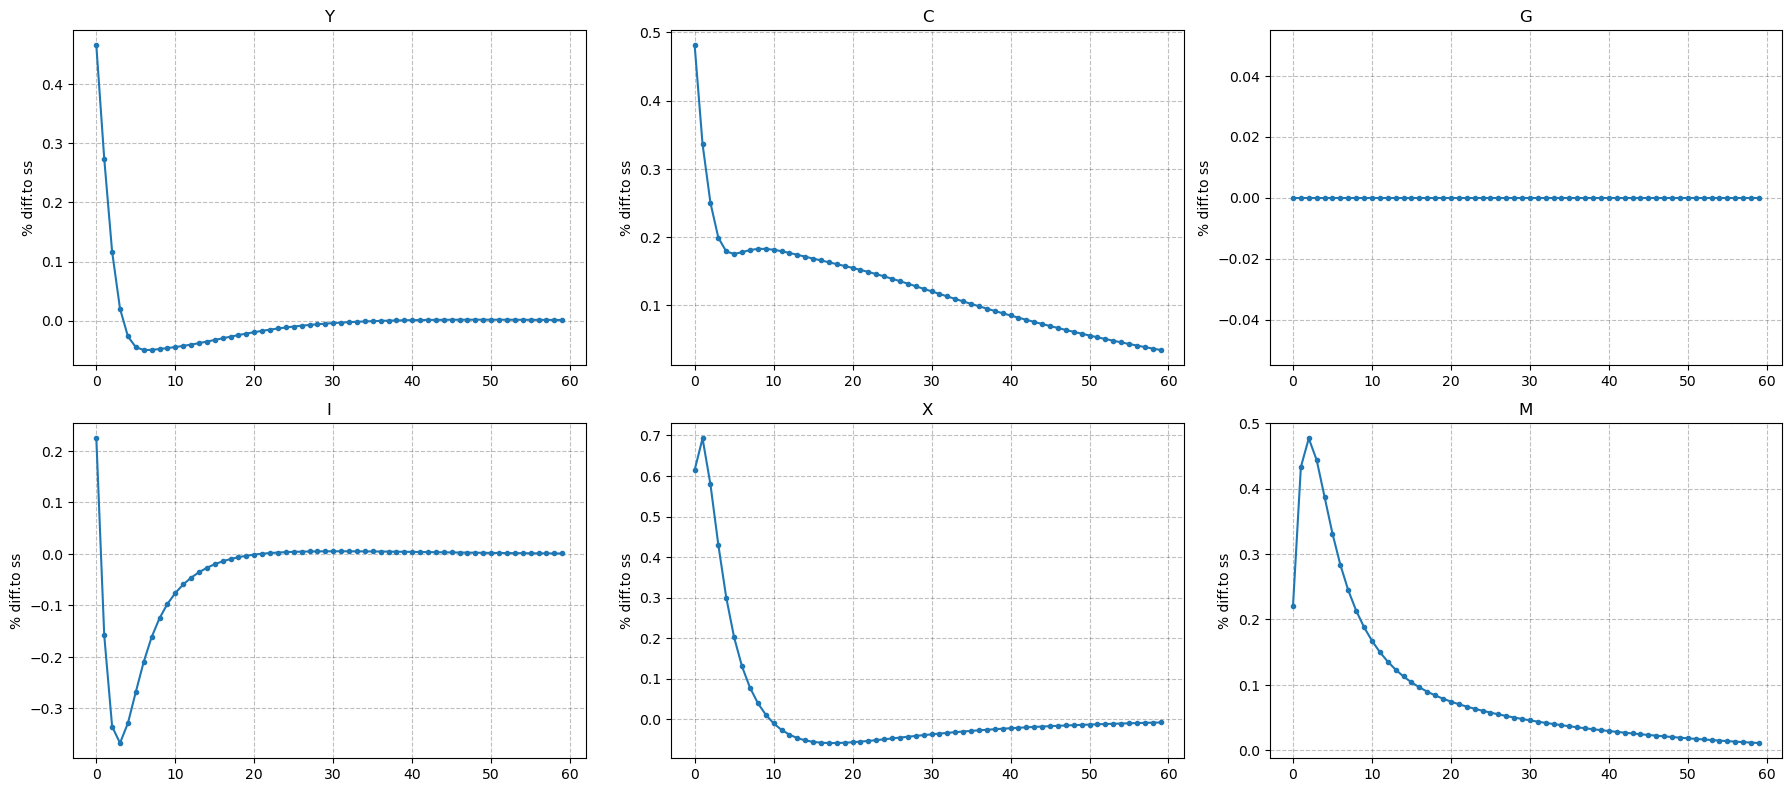

In [21]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])